Generating a synthetic signal

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def get_signal_Hz(Hz,sample_rate,length_ts_sec):
    ## 1 sec length time series with sampling rate
    ts1sec = list(np.linspace(0,np.pi*2*Hz,sample_rate))
    ## 1 sec length time series with sampling rate
    ts = ts1sec*length_ts_sec
    return(list(np.sin(ts)))

sample_rate   = 4000
length_ts_sec = 3
## --------------------------------- ##
## 3 seconds of "digit 1" sound
## Pressing digit 2 buttom generates
## the sine waves at frequency
## 697Hz and 1209Hz.
## --------------------------------- ##
ts1  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec))
ts1 += np.array(get_signal_Hz(1209,sample_rate,length_ts_sec))
ts1  = list(ts1)

## -------------------- ##
## 2 seconds of silence
## -------------------- ##
ts_silence = [0]*sample_rate*1

## --------------------------------- ##
## 3 seconds of "digit 2" sounds
## Pressing digit 2 buttom generates
## the sine waves at frequency
## 697Hz and 1336Hz.
## --------------------------------- ##
ts2  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec))
ts2 += np.array(get_signal_Hz(1336,sample_rate,length_ts_sec))
ts2  = list(ts2)

## -------------------- ##
## Add up to 7 seconds
## ------------------- ##
ts = ts1 + ts_silence  + ts2

In [19]:
ts1sec = list(np.linspace(0,np.pi*2*300,500))
ts1sec

[0.0,
 3.7774661165408334,
 7.554932233081667,
 11.332398349622501,
 15.109864466163334,
 18.887330582704166,
 22.664796699245002,
 26.442262815785835,
 30.219728932326667,
 33.9971950488675,
 37.77466116540833,
 41.55212728194917,
 45.329593398490005,
 49.10705951503083,
 52.88452563157167,
 56.6619917481125,
 60.439457864653335,
 64.21692398119417,
 67.994390097735,
 71.77185621427583,
 75.54932233081666,
 79.3267884473575,
 83.10425456389834,
 86.88172068043917,
 90.65918679698001,
 94.43665291352083,
 98.21411903006167,
 101.9915851466025,
 105.76905126314334,
 109.54651737968418,
 113.323983496225,
 117.10144961276583,
 120.87891572930667,
 124.6563818458475,
 128.43384796238834,
 132.21131407892918,
 135.98878019547,
 139.76624631201085,
 143.54371242855166,
 147.3211785450925,
 151.09864466163333,
 154.87611077817417,
 158.653576894715,
 162.43104301125584,
 166.20850912779667,
 169.9859752443375,
 173.76344136087835,
 177.54090747741918,
 181.31837359396002,
 185.09583971050083

In [20]:
from IPython.display import Audio
audio=Audio(ts, rate=sample_rate)
audio

Spectrogram from Scratch
A short-time Fourier transform (STFT) is the effect of windowing a signal and calculating its discrete Fourier transform (DFT).
Spectrogram is the magnitude of the STFT.

The total time series length = 7.0 sec (N points = 28000) 


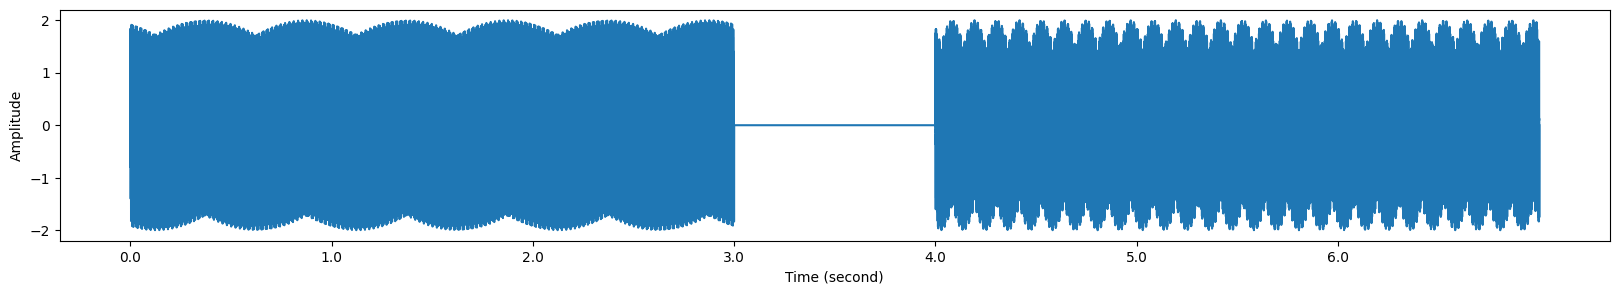

In [29]:
total_ts_sec = len(ts)/sample_rate
print("The total time series length = {} sec (N points = {}) ".format(total_ts_sec, len(ts)))
plt.figure(figsize=(20,3))
plt.plot(ts)
plt.xticks(np.arange(0,len(ts),sample_rate),np.arange(0,len(ts)/sample_rate,1))
plt.ylabel("Amplitude")
plt.xlabel("Time (second)")
plt.show()

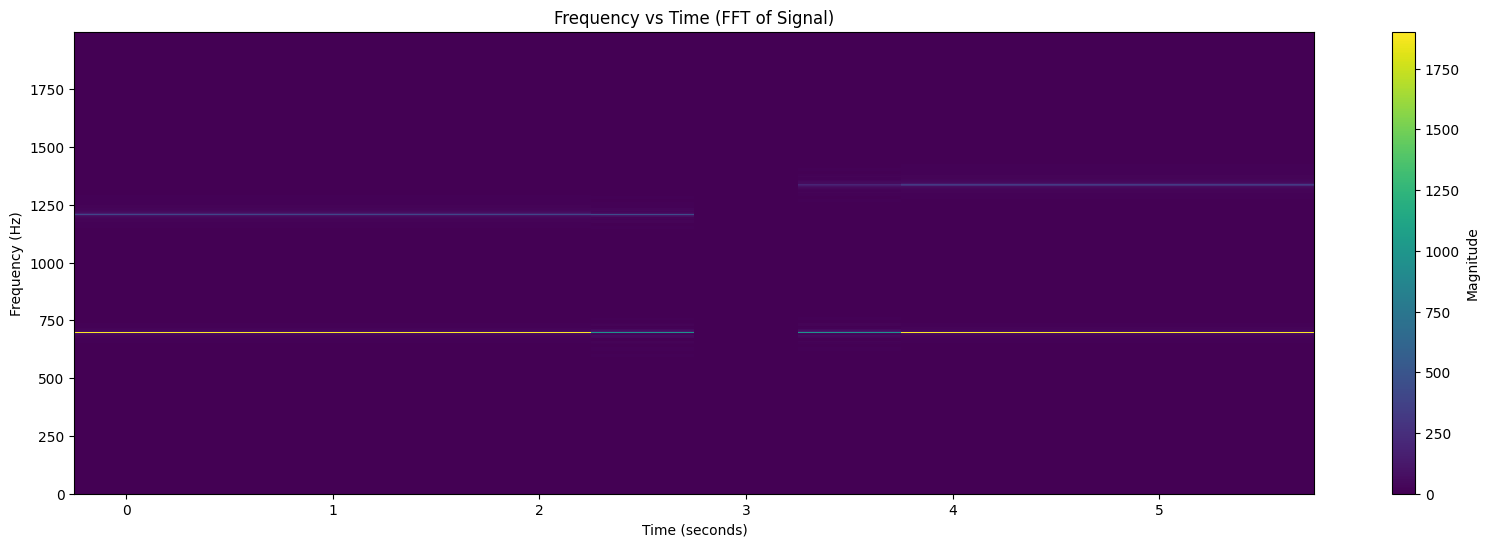

In [38]:
import numpy as np
import matplotlib.pyplot as plt

window_size = 4000
hop_size = 2000

frequencies = np.fft.fftfreq(window_size, 1/sample_rate)
time_bins = []
spectrogram = []

for start in range(0, len(ts) - window_size, hop_size):
    window = ts[start:start + window_size]
    fft_result = np.fft.fft(window)
    spectrogram.append(np.abs(fft_result))
    time_bins.append(start / sample_rate)

spectrogram = np.array(spectrogram)

plt.figure(figsize=(20, 6))
plt.pcolormesh(time_bins, frequencies[:window_size // 2], spectrogram.T[:window_size // 2], shading='auto')
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")
plt.title("Frequency vs Time (FFT of Signal)")
plt.colorbar(label="Magnitude")
plt.show()


*Q1: Convert the above signal to frequency vs time.*

Spectrogram using Scipy

In [22]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

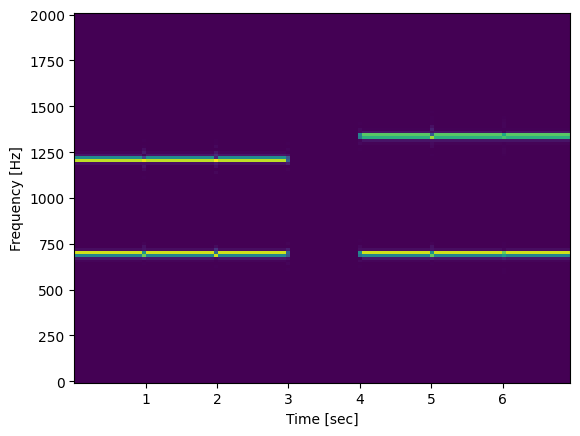

In [23]:
#computing STFT i.e. fourier transforms in regular intervals
f, t, Sxx = signal.spectrogram(np.array(ts), 4000)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [24]:
import librosa
import librosa.display
import IPython.display as ipd

In [25]:
audio_data=np.array(ts)

In [26]:
stft_audio = librosa.stft(audio_data, n_fft = 2048, hop_length = 512)
#n_fft=length of the windowed signal
#hop_length= number of samples between two successive frames

<ipython-input-27-0b5baa1a7e99>:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft_audio, sr = 4000, hop_length = 512, x_axis = "time", y_axis = "linear")


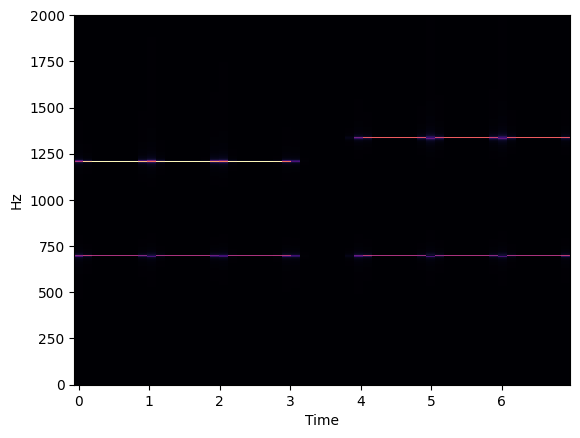

In [27]:
librosa.display.specshow(stft_audio, sr = 4000, hop_length = 512, x_axis = "time", y_axis = "linear")

*Q2. Plot the spectrogram of a .wav file.*